In [50]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
from transformations import artists, albums, tracks, track_features

In [51]:
conn = sqlite3.connect("spotify.db")
curs = conn.cursor()

<IPython.core.display.Javascript object>


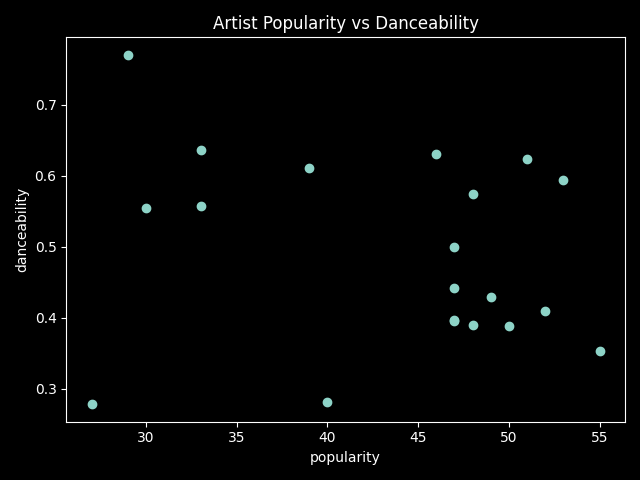

In [62]:
curs.execute("SELECT * FROM VW_artist_style_overview")
df = pd.DataFrame(curs.fetchall())
df.columns = ["artist_name", "popularity", "genre", "avg_danceability", "avg_energy", "avg_tempo", "avg_loudness"]

plt.style.use("dark_background")
fig, ax = plt.subplots()

ax.scatter(df["popularity"], df["avg_danceability"])
ax.set_title("Artist Popularity vs Danceability")
ax.set_xlabel("popularity")
ax.set_ylabel("danceability")
fig.tight_layout()

<IPython.core.display.Javascript object>


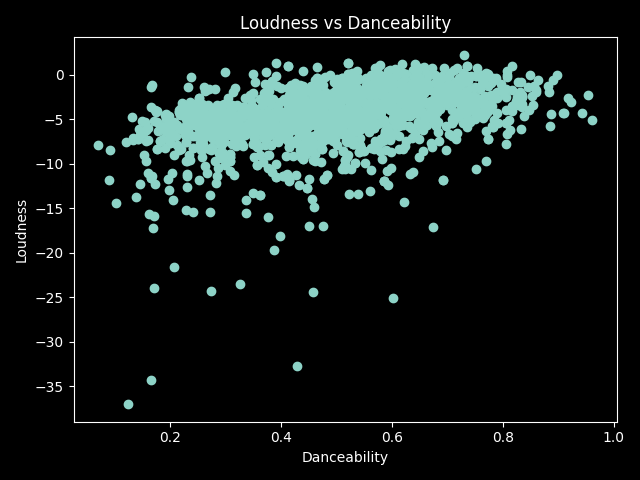

In [61]:
plt.style.use("dark_background")

fig, ax = plt.subplots()

ax.scatter(track_features["danceability"], track_features["loudness"])
ax.set_title("Loudness vs Danceability")
ax.set_xlabel("Danceability")
ax.set_ylabel("Loudness")
fig.tight_layout()